In [2]:
#to import numpy and matplotlib as np and plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#h5py is used to work with binary data
import h5py
h5py.enable_ipython_completer()

In [4]:
#I should use L0100N1504
filepath = '/cosma7/data/Eagle/ScienceRuns/Planck1/L0100N1504/PE/REFERENCE/data'

#taking a random file: groups have a redshift indication, each of them has multiple files.
#the number of files eagle_subfind_tab_011_z003p528."NOF".hdf5 corresponds to the NOF per snapshot
randomfile = '/cosma7/data/Eagle/ScienceRuns/Planck1/L0100N1504/PE/REFERENCE/data/groups_012_z003p017/eagle_subfind_tab_012_z003p017.0.hdf5'

In [24]:
#let's read the file
fileread = h5py.File(randomfile, 'r')

print(fileread.keys())

#let's print all the attributes
print("The attributes of 'Header': ")
for i in fileread['Header'].attrs:
    print(i)
    
print(fileread['Header'].attrs['NumPart_Total'])

print("The attributes of 'Units': ")
for i in fileread['Units'].attrs:
    print(i)
    
print("The attributes of 'Constants' are: ")
for i in fileread['Constants'].attrs:
    print(i)
    
#print(fileread['Parameters']['ChemicalElements'])

    
print(fileread['Constants'].attrs['CM_PER_MPC'])
    
print('The length is in units of: ' , fileread['Units'].attrs['UnitLength_in_cm'], ' cm')

#print(fileread['Parameters'].attrs['])

<KeysViewHDF5 ['Constants', 'FOF', 'Header', 'IDs', 'Parameters', 'Subhalo', 'Units']>
The attributes of 'Header': 
BoxSize
E(z)
ExpansionFactor
Flag_Cooling
Flag_DoublePrecision
Flag_Feedback
Flag_IC_Info
Flag_Metals
Flag_Sfr
Flag_StellarAge
H(z)
HubbleParam
MassTable
NTask
Ngroups
Nids
Nsubgroups
NumFilesPerSnapshot
NumPart_ThisFile
NumPart_Total
NumPart_Total_HighWord
Omega0
OmegaBaryon
OmegaLambda
Redshift
RunLabel
SendOffSetTask
Time
TotNgroups
TotNids
TotNsubgroups
[   2595893    3069221 1113734183          0          0          0]
The attributes of 'Units': 
UnitDensity_in_cgs
UnitEnergy_in_cgs
UnitLength_in_cm
UnitMass_in_g
UnitPressure_in_cgs
UnitTime_in_s
UnitVelocity_in_cm_per_s
The attributes of 'Constants' are: 
AVOGADRO
BOLTZMANN
C
CM_PER_MPC
ELECTRONCHARGE
ELECTRONMASS
EV_TO_ERG
GAMMA
GAS_CONST
GRAVITY
HUBBLE
PI
PLANCK
PROTONMASS
RAD_CONST
SEC_PER_MEGAYEAR
SEC_PER_YEAR
SOLAR_LUM
SOLAR_MASS
STEFAN
THOMPSON
T_CMB0
Z_Solar
3.085678e+24
The length is in units of:  3.085678e+

In [6]:
print('The redshift is ', fileread['Header'].attrs['Redshift'])

NumFilesPerSnapshot = fileread['Header'].attrs['NumFilesPerSnapshot']
print('The number of files per snapshot is ', NumFilesPerSnapshot)

The redshift is  3.0165046357126
The number of files per snapshot is  1536


In [20]:
#friends of friends
for i in fileread['Parameters']:
    print(i)
    
print(np.array(fileread['FOF/FirstSubhaloID']))
print(len(np.array(fileread['FOF/FirstSubhaloID'])))
print(len(np.array(fileread['FOF/Group_M_Mean200'])))

ChemicalElements
[     0    678   1250 ... 103120 103137 103163]
1691
1691


In [8]:
#open a file
myfile = fileread

#prefix for each filename
generic_name = '/cosma7/data/Eagle/ScienceRuns/Planck1/L0100N1504/PE/REFERENCE/data/'
specific_name = ['groups_012_z003p017/eagle_subfind_tab_012_z003p017.']
#number of files per snapshot
NumFilesPerSnapshot = myfile['Header'].attrs['NumFilesPerSnapshot']
#myfile.close()
print(NumFilesPerSnapshot)

FirstSubhaloID = []  #main halos
Pos = []  #positions
SFR = []  #SFR
M200 = []  #Mass inside the radius where the mean density is higher than 200 the critical density of the Universe
MassType = []   #Mass

for i in range(NumFilesPerSnapshot):
    filename = generic_name + specific_name[0] +'%d.hdf5'%i
    myfile = h5py.File(filename, 'r')
    
    FirstSubhaloID.extend(myfile['FOF/FirstSubhaloID'][()])
    Pos.append(myfile['Subhalo/CentreOfMass'][()])
    SFR.extend(myfile['Subhalo/StarFormationRate'][()])
    M200.extend(myfile['FOF/Group_M_Crit200'][()]* 1e10) 
    MassType.append(myfile['Subhalo/MassType'][()] * 1e10)
    
    myfile.close()

1536


In [9]:
print(np.shape(FirstSubhaloID)) #The number of subhalos in all files
print(np.shape(Pos))  #The number of Pos but only of the files because we used append
print(np.shape(Pos[0])) #The number of subhalos of the 1st file with the three spatial coordinates

(2595893,)
(1536,)
(2638, 3)


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [10]:
N_pos = 0
for i in range(NumFilesPerSnapshot):
    N_pos += len(Pos[i])
    
print('The number of total galaxies: ', N_pos)
print('The number of central galaxies: ', len(FirstSubhaloID))

The number of total galaxies:  3069221
The number of central galaxies:  2595893


In [11]:
print(np.shape(SFR)) #And of course we have SFR for each galaxy!

(3069221,)


In [12]:
np.shape(MassType[0])
#0 = Gas mass
#1 = Dark matter mass
#4 = Stellar mass
#5 = Black holes

(2638, 6)

In [13]:
#Since Pos and Mass are 3d structures we stack them to obtain a 2d matrix

Pos = np.vstack(Pos)
MassType = np.vstack(MassType)
print(Pos.shape)
print(MassType.shape)

SFR = np.asarray(SFR)
M200 = np.asarray(M200)

print(np.shape(SFR), np.shape(M200))

(3069221, 3)
(3069221, 6)
(3069221,) (2595893,)


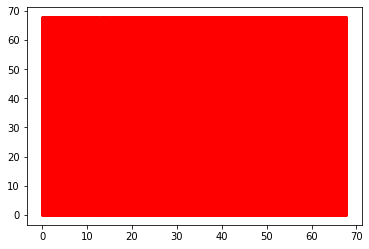

In [14]:
%matplotlib inline

plt.plot(Pos[:,0], Pos[:,1], '.k', markersize=1)
plt.plot(Pos[FirstSubhaloID,0], Pos[FirstSubhaloID,1], 'or', markersize=1)
#plt.xlim(0,2)
#plt.ylim(0,2)

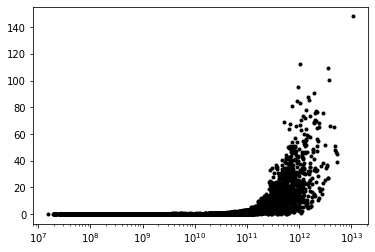

In [15]:
plt.plot(M200, SFR[FirstSubhaloID], '.k')
plt.xscale('log')

In [47]:
#open a file
myfile = fileread

#prefix for each filename
generic_name = '/cosma7/data/Eagle/ScienceRuns/Planck1/L0100N1504/PE/REFERENCE/data/'
specific_name = ['groups_002_z009p993/eagle_subfind_tab_002_z009p993.','groups_012_z003p017/eagle_subfind_tab_012_z003p017.',
                'groups_028_z000p000/eagle_subfind_tab_028_z000p000.']

FirstSubhaloID = [[] for i in range(len(specific_name))]  #main halos
Pos = [[] for i in range(len(specific_name))]  #positions
SFR = [[] for i in range(len(specific_name))]  #SFR
M200 = [[] for i in range(len(specific_name))]  #Mass inside the radius where the mean density is higher than 200 the critical density of the Universe
MassType = [[] for i in range(len(specific_name))]   #Mass
redshift = []  #Redshift
R200 = [[] for i in range(len(specific_name))]

for i in range(len(specific_name)):
    filename = generic_name + specific_name[i] + '0.hdf5'
    myfile = h5py.File(filename, 'r')
    NumFilesPerSnapshot = myfile['Header'].attrs['NumFilesPerSnapshot']
    print(NumFilesPerSnapshot)

    for j in range(NumFilesPerSnapshot):
        
        filename = generic_name + specific_name[i] + '%d.hdf5' %j
        myfile = h5py.File(filename, 'r')
        
        FirstSubhaloID[i].extend(myfile['FOF/FirstSubhaloID'][()])
        Pos[i].append(myfile['Subhalo/CentreOfMass'][()])
        SFR[i].extend(myfile['Subhalo/StarFormationRate'][()])
        M200[i].extend(myfile['FOF/Group_M_Crit200'][()]* 1e10) 
        MassType[i].append(myfile['Subhalo/MassType'][()] * 1e10)
        R200[i].extend(myfile['FOF/Group_R_Crit200'][()]* 3.085678e+24)
        if j==0:
            redshift.append(myfile['Header'].attrs['Redshift'])
        
        myfile.close()

1536
1536
256


In [48]:
for i in range(len(specific_name)):
    Pos[i] = np.vstack(Pos[i])
    MassType[i] = np.vstack(MassType[i])
    print(Pos[i].shape)
    print(MassType[i].shape)

    SFR[i] = np.asarray(SFR[i])
    M200[i] = np.asarray(M200[i])
    R200[i] = np.asarray(R200[i])
    
print(np.shape(SFR), np.shape(M200))

(515024, 3)
(515024, 6)
(3069221, 3)
(3069221, 6)
(2275510, 3)
(2275510, 6)
(3,) (3,)


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [49]:
print(redshift)
print(shape(Pos[0]))

[9.993033729877588, 3.0165046357126, 2.220446049250313e-16]
(515024, 3)


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


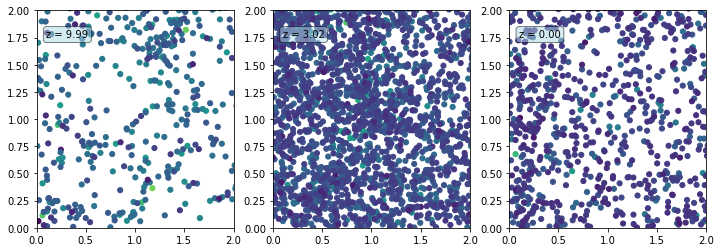

In [50]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
for i in range(len(specific_name)):
    #ax[i].plot(Pos[i][:,0], Pos[i][:,1], '.k')
    ax[i].scatter(Pos[i][FirstSubhaloID[i],0], Pos[i][FirstSubhaloID[i],1], 
               s=(np.log10(R200[i]))/2+15, c=np.log10(M200[i])/2, cmap='viridis')
    ax[i].set_xlim(0,2)
    ax[i].set_ylim(0,2)
    props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
    ax[i].text(0.1,1.75, 'z = %.2f' %redshift[i], bbox=props)
    

In [51]:
print(M200[0].shape)
print(len(FirstSubhaloID[0]))

(417668,)
417668


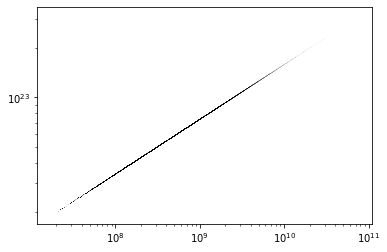

In [52]:
plt.plot(M200[0], R200[0], '.k', markersize=0.01)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(10e8,10e9)

In [53]:
print(SFR)

[array([1.6294886 , 1.2743584 , 0.19322336, ..., 0.        , 0.        ,
       0.        ], dtype=float32), array([148.0171   ,   3.5563815,  30.753319 , ...,   0.       ,
         0.       ,   0.       ], dtype=float32), array([10.126255 , 16.287073 ,  2.4492826, ...,  0.       ,  0.       ,
        0.       ], dtype=float32)]


In [56]:
#Lya = 10^42*SFR

L_lya = [[] for i in range(len(specific_name))]

for i in range(len(specific_name)):
    L_lya[i] = 10**42* SFR[i]
    


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


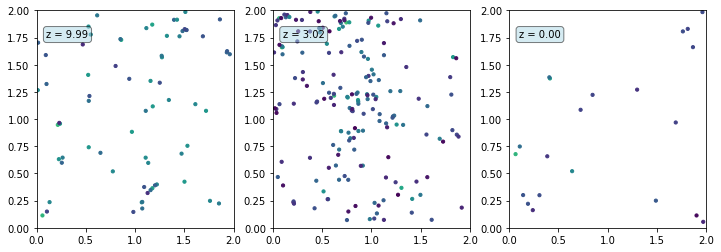

In [122]:
#plotting sources with Lya luminosity colorscale
fig, ax = plt.subplots(1,3, figsize=(12,4))
for i in range(len(specific_name)):
    #ax[i].plot(Pos[i][:,0], Pos[i][:,1], '.k')
    ax[i].scatter(Pos[i][:,0], Pos[i][:,1], 
               s=10, c=np.log10(L_lya[i].astype(float)), cmap='viridis')
    ax[i].set_xlim(0,2)
    ax[i].set_ylim(0,2)
    props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
    ax[i].text(0.1,1.75, 'z = %.2f' %redshift[i], bbox=props)
  

In [111]:
print(np.log10(L_lya[0][FirstSubhaloID[0]].astype(float)))
print(len(FirstSubhaloID[0]))

[42.21205132 42.2259328  43.33266518 ...        -inf        -inf
        -inf]
417668


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [120]:
print(len(FirstSubhaloID[0]), len(SFR[0]))

417668 515024


In [127]:
for i in fileread['Subhalo']:
    print(i)

ApertureMeasurements
BlackHoleMass
BlackHoleMassAccretionRate
CentreOfMass
CentreOfPotential
GasSpin
GroupNumber
HalfMassProjRad
HalfMassRad
IDMostBound
InertiaTensor
InitialMassWeightedBirthZ
InitialMassWeightedStellarAge
KineticEnergy
Mass
MassTwiceHalfMassRad
MassType
NSF
SF
StarFormationRate
Stars
StellarInitialMass
StellarVelDisp
StellarVelDisp_HalfMassProjRad
SubGroupNumber
SubLength
SubLengthType
SubOffset
ThermalEnergy
TotalEnergy
Velocity
Vmax
VmaxRadius


In [133]:
print(np.min(Pos[0][:,2]), np.max(Pos[0][:,2]))

4.656624e-05 67.76998


In [139]:
print(np.max(L_lya[1]), np.min(L_lya[1][L_lya[1]!=0]))

1.4801710510253906e+44 6.487884093075991e+38


[8.38942958e+38 1.40278507e+39 2.34557776e+39 3.92200855e+39
 6.55793695e+39 1.09654368e+40 1.83351572e+40 3.06579661e+40
 5.12627666e+40 8.57157722e+40 1.43324172e+41 2.39650392e+41
 4.00716149e+41 6.70032002e+41 1.12035136e+42 1.87332422e+42
 3.13235985e+42 5.23757614e+42 8.75767956e+42 1.46435964e+43
 2.44853577e+43 4.09416323e+43 6.84579444e+43 1.14467594e+44]


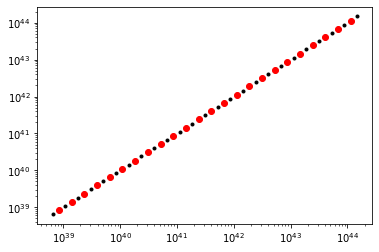

In [163]:
#Lya luminosity function

minimo = np.min(L_lya[1][L_lya[1]!=0])
massimo = np.max(L_lya[1])

lyabins = np.logspace(np.log10(minimo), np.log10(massimo), 25)
lyabins_average = np.array((np.log10(lyabins[1:]) - np.log10(lyabins[:-1]))/2 + np.log10(lyabins[:-1]))
lyabins_average = 10**lyabins_average
print((lyabins_average))

plt.xscale('log')
plt.yscale('log')
plt.plot(lyabins, lyabins, '.k')
plt.plot(lyabins_average, lyabins_average, 'or')

In [188]:
counts = [[] for i in range(len(lyabins_average))]

for i in range(len(L_lya[1])):
    for j in range(len(lyabins)):
        if L_lya[1][i] == lyabins[-1]:
            counts[-1].append(i)
            print('true')
            break
        if L_lya[1][i] < lyabins[0]:
            break
        if L_lya[1][i]<lyabins[j]:
            counts[j-1].append(i)
            #print(L_lya[1][i], lyabins[j],j)
            break
        
            
counts_sum = []

for i in range(len(counts)):
    counts_sum.append(len(counts[i]))
    
counts_sum = np.array(counts_sum)

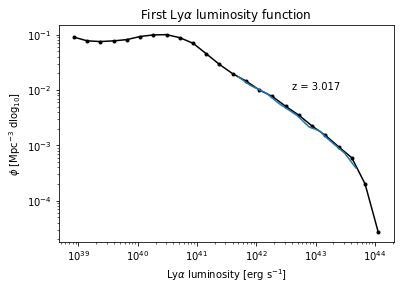

In [228]:
plt.plot(lyabins_average, counts_sum/10**6/(np.log10(lyabins[1:])-np.log10(lyabins[:-1])), '.k-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Ly$\alpha$ luminosity [erg s$^{-1}$]')
plt.ylabel(r'$\phi$ [Mpc$^{-3}$ dlog$_{10}$]')
plt.text(4e42, 1e-2, 'z = %.3f' %redshift[1] )
plt.title(r'First Ly$\alpha$ luminosity function')
#plt.xlim(1e41, 5e43)

mackenzie =  np.loadtxt('Mackenzie.txt')
plt.plot(mackenzie[:,0], mackenzie[:,1])

In [223]:
print((np.log1(lyabins[1:]) - np.log10(lyabins[:-1])))

[1.67208635 1.67208635 1.67208635 1.67208635 1.67208635 1.67208635
 1.67208635 1.67208635 1.67208635 1.67208635 1.67208635 1.67208635
 1.67208635 1.67208635 1.67208635 1.67208635 1.67208635 1.67208635
 1.67208635 1.67208635 1.67208635 1.67208635 1.67208635 1.67208635]


In [226]:
print(Pos[1][0,:]) 

[16.384527 52.459282 41.567524]


In [25]:
print(NumFilesPerSnapshot)

1536
